# Food Waste

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('./data/01_제공데이터/01_음식물쓰레기_FOOD_WASTE.CSV', encoding='CP949',low_memory=False)

- base_date : 배출일자 DateTime
- city : 시 구분 Str
- emd_cd : 행정동 코드 Str
- emd_nm : 행정동명 Str
- em_area_cd : 배출거전지역 코드 Str
- em_cnt : 배출건수 int
- em_g : 배출량 int
- pay_amt : 총 지불금액 int

In [3]:
data.head()

,base_date,city,emd_cd,emd_nm,em_area_cd,em_cnt,em_g,pay_amt
0,2018-01-01,제주시,50110670,외도동,W6X062,2,15500,464
1,2018-01-01,제주시,50110540,이도2동,W6X063,26,64650,1933
2,2018-01-01,제주시,50110630,아라동,W6X064,15,33500,1001
3,2018-01-01,제주시,50110610,삼양동,W6X065,4,8400,252
4,2018-01-01,제주시,50110540,이도2동,W6X066,21,51450,1538


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209861 entries, 0 to 2209860
Data columns (total 8 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   base_date   object
 1   city        object
 2   emd_cd      object
 3   emd_nm      object
 4   em_area_cd  object
 5   em_cnt      int64 
 6   em_g        int64 
 7   pay_amt     int64 
dtypes: int64(3), object(5)
memory usage: 134.9+ MB


In [5]:
data.describe()

,em_cnt,em_g,pay_amt
count,2.209861e+06,2.209861e+06,2.209861e+06
mean,2.125185e+01,4.801807e+04,1.436982e+03
std,2.714270e+01,5.929738e+04,2.756821e+03
min,1.000000e+00,-7.394700e+04,0.000000e+00
25%,6.000000e+00,1.295000e+04,3.850000e+02
50%,1.300000e+01,3.090000e+04,9.210000e+02
75%,2.700000e+01,6.215000e+04,1.854000e+03
max,1.580000e+03,2.520642e+06,1.396147e+06


In [6]:
df_data = data.copy()

## 배출일자

In [7]:
df_data.base_date.value_counts()

2020-07-31    2125
2020-07-30    2125
2020-08-05    2123
2020-08-08    2123
2020-08-07    2121
              ... 
2021-03-20    1355
2020-06-25     932
2020-06-28     926
2020-06-26     924
2020-06-27     894
Name: base_date, Length: 1276, dtype: int64

In [8]:
tmp_date = pd.to_datetime(df_data.base_date)

In [9]:
df_data['year'] = tmp_date.dt.year
df_data['month'] = tmp_date.dt.month
df_data['date'] = tmp_date.dt.day

In [10]:
df_data.drop(['base_date'],axis='columns',inplace=True)

In [11]:
df_data

,city,emd_cd,emd_nm,em_area_cd,em_cnt,em_g,pay_amt,year,month,date
0,제주시,50110670,외도동,W6X062,2,15500,464,2018,1,1
1,제주시,50110540,이도2동,W6X063,26,64650,1933,2018,1,1
2,제주시,50110630,아라동,W6X064,15,33500,1001,2018,1,1
3,제주시,50110610,삼양동,W6X065,4,8400,252,2018,1,1
4,제주시,50110540,이도2동,W6X066,21,51450,1538,2018,1,1
...,...,...,...,...,...,...,...,...,...,...
2209856,서귀포시,50130250,대정읍,W6Y722,16,26950,805,2020,12,14
2209857,서귀포시,50130250,대정읍,W6Y72A,3,17000,510,2020,12,14
2209858,서귀포시,50130310,안덕면,W6Y72B,5,5650,168,2020,12,14
2209859,서귀포시,50130310,안덕면,W6Y72C,11,20700,619,2020,12,14


In [12]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209861 entries, 0 to 2209860
Data columns (total 10 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   city        object
 1   emd_cd      object
 2   emd_nm      object
 3   em_area_cd  object
 4   em_cnt      int64 
 5   em_g        int64 
 6   pay_amt     int64 
 7   year        int64 
 8   month       int64 
 9   date        int64 
dtypes: int64(6), object(4)
memory usage: 168.6+ MB


## city (시 구분)
- 제주시, 서귀포시, 알수없음
- 나중에 obne-hot encoding

## emd_cd (행정동 코드)
- 43개 행정동 코드 + 알수없음

In [13]:
df_data[df_data.emd_cd=="알수없음"]

,city,emd_cd,emd_nm,em_area_cd,em_cnt,em_g,pay_amt,year,month,date
1399,알수없음,알수없음,알수없음,W6Y402,21,142950,4283,2018,1,1
1404,알수없음,알수없음,알수없음,W6Y407,13,211050,6329,2018,1,1
1406,알수없음,알수없음,알수없음,W6Y409,7,44950,1348,2018,1,1
2849,알수없음,알수없음,알수없음,W6Y402,20,104250,3123,2018,1,2
2854,알수없음,알수없음,알수없음,W6Y407,9,99250,2975,2018,1,2
...,...,...,...,...,...,...,...,...,...,...
2201701,알수없음,알수없음,알수없음,W6Y734,6,23900,715,2021,6,1
2203746,알수없음,알수없음,알수없음,W6Y71C,8,105650,3168,2020,12,11
2205790,알수없음,알수없음,알수없음,W6Y71C,8,77850,2334,2020,12,12
2207837,알수없음,알수없음,알수없음,W6Y71C,11,79800,2392,2020,12,13


### 알수없음 처리 어떻게?? 

In [14]:
print(df_data.emd_cd.value_counts())
print(len(df_data.emd_cd.value_counts()))

50110660    185468
50110540    144118
50110650    141628
50110630    134637
50110520     99270
50110640     94084
50110600     89610
50110610     85396
50110670     78619
50110253     75649
50110580     70345
50130250     69690
50110259     60618
50130253     56768
50130310     55511
50110250     54783
50130570     51542
50110256     44374
50130610     42987
50110680     39289
50130259     38326
50110550     38051
50110590     36417
50130600     35269
50110620     35178
50130590     32830
50130320     32660
50110570     31705
50110530     31474
50110560     31410
50110310     30543
50110690     29050
50130560     22862
50130620     20324
50130580     20265
50130510     16435
50110510     12542
50130550     11599
50130540     11565
50130520      9368
50130530      5318
알수없음          2284
Name: emd_cd, dtype: int64
42


### 42개면 그냥 원핫인코딩??

## emd_nm

In [15]:
# 행정동명 대신 행정동 코드로 모두 다 나타낼 수 있음
df_data.drop(['emd_nm'],axis='columns',inplace=True)

In [16]:
df_data.head()

,city,emd_cd,em_area_cd,em_cnt,em_g,pay_amt,year,month,date
0,제주시,50110670,W6X062,2,15500,464,2018,1,1
1,제주시,50110540,W6X063,26,64650,1933,2018,1,1
2,제주시,50110630,W6X064,15,33500,1001,2018,1,1
3,제주시,50110610,W6X065,4,8400,252,2018,1,1
4,제주시,50110540,W6X066,21,51450,1538,2018,1,1


In [17]:
# 배출거점지역 코드 살펴보기
len(df_data[df_data.city == "알수없음"])

2284

In [18]:
df_data.em_area_cd[df_data.city == "알수없음"].value_counts()

W6Y402    395
W6Y407    383
W6Y409    379
W6Y71C    352
W6Y01     162
W6Y72E    134
W6Y730    104
W6XE5D     83
W6Y734     44
W6Y102     37
W6Y737     22
W6Y740     22
W6Y738     22
W6Y736     22
W6Y739     22
W6Y746     14
W6Y744     14
W6Y745     14
W6Y733     13
W6X1DE      7
W6Xa65      6
W6Y1        5
W6X223      4
W6X46C      4
W6X66A      4
W6X46B      4
W6X46A      4
W6YA32      2
W6Xa67      2
W6Y0        2
W6Xa75      1
W6Y4        1
Name: em_area_cd, dtype: int64

In [19]:
df_data.emd_cd[df_data.em_area_cd=='W6X678'].value_counts()

50110670    1275
Name: emd_cd, dtype: int64

In [20]:
df_data.em_area_cd[df_data.emd_cd=='50110670'].value_counts()

W6X687    1275
W6X701    1275
W6X693    1275
W6X678    1275
W6X685    1275
          ... 
W6XA85    1081
W6X718    1004
W6XD09     781
W6X125     492
W6X010       4
Name: em_area_cd, Length: 65, dtype: int64

In [21]:
keys = df_data.em_area_cd.value_counts().keys()
for key in keys:
    L = len(df_data.emd_cd[df_data.em_area_cd==key].value_counts())
    if L > 1:
        print('NO')

KeyboardInterrupt: 

위의 결과로 배출거점지역 코드가 같으면 행정동 코드도 같다. 반대로는 성립하지 않는다. ( 1대 다 관계 )

이러면 하나의 행정동에 여러 개의 배출거점지역 코드를 갖고있는 것
### 행정동코드 유지?삭제?

In [ ]:
df_data.em_area_cd.str[:3].value_counts()

In [ ]:
df_data.em_area_cd.str[2:3].value_counts()

In [ ]:
df_data[df_data.city=="제주시"]['em_area_cd'].str[2:3].value_counts()

In [ ]:
df_data[df_data.city=="서귀포시"]['em_area_cd'].str[2:3].value_counts()

In [ ]:
df_data[df_data.city=="알수없음"]['em_area_cd'].str[2:3].value_counts()

* em_area_cd에서 W6은 기본적으로 있는 것
* 2번째 위치가 city에 따라 X, Y가 결정됨

### em_area_cd를 근거로 city 알수없음 값 채우기

In [22]:
df_data['city_XY'] = df_data['em_area_cd'].str[2:3]

In [23]:
df_data['city_XY'].value_counts()

X    1674377
Y     535484
Name: city_XY, dtype: int64

In [24]:
df_data['city'] = df_data['city_XY'].replace('X','제주시')
df_data['city'] = df_data['city'].replace('Y','서귀포시')

In [25]:
df_data

,city,emd_cd,em_area_cd,em_cnt,em_g,pay_amt,year,month,date,city_XY
0,제주시,50110670,W6X062,2,15500,464,2018,1,1,X
1,제주시,50110540,W6X063,26,64650,1933,2018,1,1,X
2,제주시,50110630,W6X064,15,33500,1001,2018,1,1,X
3,제주시,50110610,W6X065,4,8400,252,2018,1,1,X
4,제주시,50110540,W6X066,21,51450,1538,2018,1,1,X
...,...,...,...,...,...,...,...,...,...,...
2209856,서귀포시,50130250,W6Y722,16,26950,805,2020,12,14,Y
2209857,서귀포시,50130250,W6Y72A,3,17000,510,2020,12,14,Y
2209858,서귀포시,50130310,W6Y72B,5,5650,168,2020,12,14,Y
2209859,서귀포시,50130310,W6Y72C,11,20700,619,2020,12,14,Y


In [26]:
df_data.drop('city_XY',axis='columns',inplace=True)

In [27]:
df_data.head()

,city,emd_cd,em_area_cd,em_cnt,em_g,pay_amt,year,month,date
0,제주시,50110670,W6X062,2,15500,464,2018,1,1
1,제주시,50110540,W6X063,26,64650,1933,2018,1,1
2,제주시,50110630,W6X064,15,33500,1001,2018,1,1
3,제주시,50110610,W6X065,4,8400,252,2018,1,1
4,제주시,50110540,W6X066,21,51450,1538,2018,1,1


In [28]:
df_data['em_area_num'] = df_data.em_area_cd.str[3:]

In [29]:
df_data.head()

,city,emd_cd,em_area_cd,em_cnt,em_g,pay_amt,year,month,date,em_area_num
0,제주시,50110670,W6X062,2,15500,464,2018,1,1,062
1,제주시,50110540,W6X063,26,64650,1933,2018,1,1,063
2,제주시,50110630,W6X064,15,33500,1001,2018,1,1,064
3,제주시,50110610,W6X065,4,8400,252,2018,1,1,065
4,제주시,50110540,W6X066,21,51450,1538,2018,1,1,066


In [30]:
df_data.emd_cd.str[:4].value_counts()

5011    1674258
5013     533319
알수없음       2284
Name: emd_cd, dtype: int64

In [31]:
df_data[df_data.emd_cd.str[:4] == '5011'].em_area_num.value_counts()

153    1276
231    1276
106    1276
104    1276
143    1276
       ... 
13E       2
000       1
A38       1
C66       1
906       1
Name: em_area_num, Length: 1849, dtype: int64

In [32]:
df_data[df_data.emd_cd.str[:4] == '5011'].city.value_counts()

제주시    1674258
Name: city, dtype: int64

In [33]:
df_data[df_data.emd_cd.str[:4] == '5013'].em_area_num.value_counts()

316    1277
244    1276
143    1276
003    1276
393    1276
       ... 
197      15
160       8
314       3
671       1
669       1
Name: em_area_num, Length: 630, dtype: int64

In [34]:
df_data[df_data.emd_cd.str[:4] == '5013'].city.value_counts()

서귀포시    533319
Name: city, dtype: int64

- 제주시는 emd_cd 앞에가 5011, 서귀포시는 5013

In [35]:
df_data['emd_back'] = df_data.emd_cd.str[4:]

In [36]:
df_data.head()

,city,emd_cd,em_area_cd,em_cnt,em_g,pay_amt,year,month,date,em_area_num,emd_back
0,제주시,50110670,W6X062,2,15500,464,2018,1,1,062,0670
1,제주시,50110540,W6X063,26,64650,1933,2018,1,1,063,0540
2,제주시,50110630,W6X064,15,33500,1001,2018,1,1,064,0630
3,제주시,50110610,W6X065,4,8400,252,2018,1,1,065,0610
4,제주시,50110540,W6X066,21,51450,1538,2018,1,1,066,0540


In [37]:
new_df = df_data.drop('emd_cd',axis='columns')
new_df = new_df.drop('em_area_cd',axis='columns')

In [38]:
new_df

,city,em_cnt,em_g,pay_amt,year,month,date,em_area_num,emd_back
0,제주시,2,15500,464,2018,1,1,062,0670
1,제주시,26,64650,1933,2018,1,1,063,0540
2,제주시,15,33500,1001,2018,1,1,064,0630
3,제주시,4,8400,252,2018,1,1,065,0610
4,제주시,21,51450,1538,2018,1,1,066,0540
...,...,...,...,...,...,...,...,...,...
2209856,서귀포시,16,26950,805,2020,12,14,722,0250
2209857,서귀포시,3,17000,510,2020,12,14,72A,0250
2209858,서귀포시,5,5650,168,2020,12,14,72B,0310
2209859,서귀포시,11,20700,619,2020,12,14,72C,0310


In [39]:
new_df['emd_back'] = new_df.emd_back.replace('','0')

In [40]:
new_df.head()

,city,em_cnt,em_g,pay_amt,year,month,date,em_area_num,emd_back
0,제주시,2,15500,464,2018,1,1,062,0670
1,제주시,26,64650,1933,2018,1,1,063,0540
2,제주시,15,33500,1001,2018,1,1,064,0630
3,제주시,4,8400,252,2018,1,1,065,0610
4,제주시,21,51450,1538,2018,1,1,066,0540


In [41]:
#new_df['emd_back'] = pd.to_numeric(new_df['emd_back'])

In [42]:
new_df.head()

,city,em_cnt,em_g,pay_amt,year,month,date,em_area_num,emd_back
0,제주시,2,15500,464,2018,1,1,062,0670
1,제주시,26,64650,1933,2018,1,1,063,0540
2,제주시,15,33500,1001,2018,1,1,064,0630
3,제주시,4,8400,252,2018,1,1,065,0610
4,제주시,21,51450,1538,2018,1,1,066,0540


In [43]:
new_df.emd_back.value_counts()

0660    185468
0540    155683
0650    141628
0630    134637
0253    132417
0610    128383
0600    124879
0250    124473
0520    108638
0259     98944
0640     94084
0580     90610
0310     86054
0570     83247
0670     78619
0590     69247
0620     55502
0560     54272
0550     49650
0256     44374
0680     39289
0530     36792
0320     32660
0690     29050
0510     28977
0         2284
Name: emd_back, dtype: int64

In [44]:
new_df[new_df.emd_back=='0250'][new_df.city=='제주시'].em_area_num.value_counts()

<ipython-input-44-13a19f0ac9e7>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df[new_df.emd_back=='0250'][new_df.city=='제주시'].em_area_num.value_counts()


EC7    588
ED3    588
EC3    588
EC4    587
ED2    587
      ... 
EE4    258
1B9    221
1D7    115
16D     18
17E      3
Name: em_area_num, Length: 112, dtype: int64

In [45]:
new_df[new_df.emd_back=='0250'][new_df.city=='서귀포시'].em_area_num.value_counts()

<ipython-input-45-6df9d92479d4>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df[new_df.emd_back=='0250'][new_df.city=='서귀포시'].em_area_num.value_counts()


456    1276
453    1266
415    1236
449    1235
423    1235
       ... 
71D     351
722     343
71B     270
633     235
72A     216
Name: em_area_num, Length: 84, dtype: int64

In [46]:
new_df[new_df.emd_back=='0250'][new_df.city=='서귀포시'].em_area_num.str[0].value_counts()

<ipython-input-46-e0210663e1ed>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df[new_df.emd_back=='0250'][new_df.city=='서귀포시'].em_area_num.str[0].value_counts()


6    34311
4    28738
3     3236
7     1532
0      983
5      890
Name: em_area_num, dtype: int64

In [47]:
new_df[new_df.emd_back=='0250'][new_df.city=='제주시'].em_area_num.str[0].value_counts()

<ipython-input-47-dfb1bc531825>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df[new_df.emd_back=='0250'][new_df.city=='제주시'].em_area_num.str[0].value_counts()


E    28872
1    13524
F    11865
2      522
Name: em_area_num, dtype: int64

In [48]:
new_df[new_df.city=='제주시'].em_area_num.str[0].value_counts()

A    153954
1    148585
2    127200
5    117910
3    116829
6    115917
4    115419
7    115403
8    113656
9    113296
B    110137
E     92228
C     79299
F     75612
D     41210
0     37713
a         9
Name: em_area_num, dtype: int64

In [49]:
new_df[new_df.emd_back=='0'].em_area_num.str[0].value_counts()

4    1170
7     799
0     164
E      83
1      49
a       9
6       4
2       4
A       2
Name: em_area_num, dtype: int64

In [50]:
new_df[new_df.emd_back=='0'].city.value_counts()

서귀포시    2165
제주시      119
Name: city, dtype: int64

In [51]:
new_df[new_df.emd_back=='0'].em_area_num.value_counts()

402    395
407    383
409    379
71C    352
01     162
72E    134
730    104
E5D     83
734     44
102     37
737     22
739     22
740     22
736     22
738     22
746     14
744     14
745     14
733     13
1DE      7
a65      6
1        5
46B      4
223      4
66A      4
46C      4
46A      4
0        2
a67      2
A32      2
a75      1
4        1
Name: em_area_num, dtype: int64

## 위의 추측으로 알수없음 emd_back 채워주기

In [52]:
new_df[new_df.em_area_num=='402'].emd_back.value_counts()

0520    1271
0        395
Name: emd_back, dtype: int64

In [53]:
new_df[new_df.em_area_num=='402'][new_df.city=='서귀포시'].emd_back.value_counts()

<ipython-input-53-5c84fec2fbf7>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df[new_df.em_area_num=='402'][new_df.city=='서귀포시'].emd_back.value_counts()


0    395
Name: emd_back, dtype: int64

In [54]:
new_df[new_df.em_area_num=='402'][new_df.city=='제주시'].emd_back.value_counts()

<ipython-input-54-c193e1cb6037>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df[new_df.em_area_num=='402'][new_df.city=='제주시'].emd_back.value_counts()


0520    1271
Name: emd_back, dtype: int64

In [55]:
new_df.head()

,city,em_cnt,em_g,pay_amt,year,month,date,em_area_num,emd_back
0,제주시,2,15500,464,2018,1,1,062,0670
1,제주시,26,64650,1933,2018,1,1,063,0540
2,제주시,15,33500,1001,2018,1,1,064,0630
3,제주시,4,8400,252,2018,1,1,065,0610
4,제주시,21,51450,1538,2018,1,1,066,0540


### 일단 임의로 0대신 0520 넣는다. (서귀포시의 0520이 누락되었다는 가정하에)

In [77]:
def put(x):
    if x['em_area_num'] == '402' or x['em_area_num'] == '407' or x['em_area_num']=='409':
        return '0520'
    else:
        return x['emd_back']
    

In [78]:
new_df.emd_back = new_df.apply(lambda x : put(x), axis=1)

In [ ]:
new_df[new_df.em_area_num=='407'].emd_back.value_counts()

In [ ]:
new_df[new_df.em_area_num=='407'][new_df.city=='서귀포시'].emd_back.value_counts()

In [ ]:
new_df[new_df.em_area_num=='407'][new_df.city=='제주시'].emd_back.value_counts()

In [ ]:
new_df[new_df.em_area_num=='409'].emd_back.value_counts()

In [ ]:
new_df[new_df.em_area_num=='409'].city.value_counts()

In [ ]:
new_df[new_df.em_area_num=='71C'].emd_back.value_counts()

In [ ]:
new_df[new_df.em_area_num=='71C'].city.value_counts()

In [ ]:
new_df[new_df.em_area_num=='01'].emd_back.value_counts()

In [ ]:
new_df[new_df.emd_back=='0'].city.value_counts()

In [ ]:
new_df[new_df.emd_back=='0'].em_area_num.value_counts()

## 평균 배출 칼럼 추가

In [62]:
def makeAvg(x):
    return round(x['em_g'] / x['em_cnt'],2)

In [63]:
new_df['em_avg'] = new_df.apply(lambda x : makeAvg(x),axis=1)

In [ ]:
new_df.head()

## 쓰레기 양

In [ ]:
new_df

### 행정동 별

In [ ]:
plt.xticks(rotation = -45)
sns.barplot(x='emd_back',y='em_g',hue='city',data=new_df)

### 배출거점지역별

KeyboardInterrupt: 

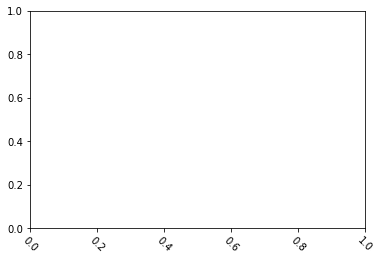

In [79]:
plt.xticks(rotation = -45)
sns.barplot(x='em_area_num',y='em_g',hue='city',data=new_df)

In [80]:
new_df.groupby(['emd_back','city']).agg(lambda x: '/'.join(set(x)))

em_area_num
emd_back city                                                   
0        서귀포시  730/746/4/733/734/72E/739/0/A32/738/737/740/10...
         제주시             66A/46A/a67/46C/a65/E5D/1DE/223/a75/46B
0250     서귀포시  448/624/421/413/611/610/718/649/634/612/71B/62...
         제주시   EF3/1B8/EC9/EB7/1C2/EF5/F77/EB8/EC1/1A6/EC2/EC...
0253     서귀포시  391/360/366/345/392/370/358/368/386/382/390/35...
         제주시   E96/12F/13D/E81/F47/E90/F27/1B3/13F/F49/E75/F6...
0256     제주시   E62/E03/E05/E23/E24/E12/FD4/FD3/E56/E43/E32/FD...
0259     서귀포시  494/696/471/514/520/515/503/480/472/486/400/49...
         제주시   D18/FF4/1AE/D30/098/07D/FA3/FFA/06C/18B/F9E/19...
0310     서귀포시  434/593/587/429/605/586/590/599/436/330/594/57...
         제주시   1F5/E3B/E1B/E9A/E4C/1E4/1F1/E5C/2A8/E4D/E6A/E1...
0320     서귀포시  541/405/401/538/404/543/528/406/564/555/536/55...
0510     서귀포시  141/094/101/098/090/107/136/097/137/140/095/13...
         제주시             169/173/162/167/166/170/172/165/168/163
0520     서귀포시  407/057/067/409/028/060/058/064/063/059/065/40...
         제주시   045/448/AB5/392/421/404/413/436/AB8/AB1/393/42...
0530     서귀포시                                070/074/069/072/071
         제주시   184/192/196/175/181/178/183/042/188/195/C18/19...
0540     서귀포시        078/083/086/079/075/084/081/087/313/085/082
         제주시   B68/462/522/543/526/486/499/465/493/475/489/47...
0550     서귀포시  280/279/261/264/276/293/281/260/262/268/282/26...
         제주시   C58/576/564/575/555/573/554/563/562/557/237/57...
0560     서귀포시  272/275/661/668/664/207/212/273/213/304/217/66...
         제주시   C01/141/131/150/133/158/151/153/132/146/155/13...
0570     서귀포시  002/116/131/701/303/133/122/318/119/124/311/11...
         제주시   206/197/220/225/207/212/213/217/224/204/209/20...
0580     서귀포시  045/104/466/326/465/671/023/020/106/320/669/14...
         제주시   624/593/586/587/590/599/605/611/C14/B64/594/60...
0590     서귀포시  036/308/158/170/654/316/051/153/159/160/172/15...
         제주시   366/370/368/386/382/387/365/378/364/385/381/38...
0600     서귀포시  197/184/196/192/031/329/175/151/032/331/181/18...
         제주시   345/329/331/311/AA4/315/332/349/346/319/338/31...
0610     서귀포시  231/291/220/235/227/226/462/224/238/042/321/30...
         제주시   272/275/280/279/291/299/B49/C70/AD4/261/303/10...
0620     서귀포시  244/254/72D/247/243/253/248/252/241/249/255/25...
         제주시   251/C89/C93/258/250/244/C60/C57/252/241/249/25...
0630     제주시   975/997/A34/B78/A21/AC9/A24/972/979/988/993/A2...
0640     제주시   746/661/671/649/669/A69/AC5/A74/A72/C72/A75/66...
0650     제주시   890/904/C66/939/918/B72/947/C11/944/863/881/87...
0660     제주시   828/856/002/227/788/846/797/B96/807/B92/816/79...
0670     제주시   A86/B26/D09/468/696/679/701/A84/069/A85/681/71...
0680     제주시   730/743/732/731/733/723/734/739/747/742/735/72...
0690     제주시   761/AC4/754/751/B98/755/764/766/762/C85/763/75...

In [93]:
new_df.groupby(['city','emd_back']).agg(lambda x: '/'.join(set(x)))

em_area_num
city emd_back                                                   
서귀포시 0         730/746/4/733/734/72E/739/0/A32/738/737/740/10...
     0250      448/624/421/413/611/610/718/649/634/612/71B/62...
     0253      391/360/366/345/392/370/358/368/386/382/390/35...
     0259      494/696/471/514/520/515/503/480/472/486/400/49...
     0310      434/593/587/429/605/586/590/599/436/330/594/57...
     0320      541/405/401/538/404/543/528/406/564/555/536/55...
     0510      141/094/101/098/090/107/136/097/137/140/095/13...
     0520      407/057/067/409/028/060/058/064/063/059/065/40...
     0530                                    070/074/069/072/071
     0540            078/083/086/079/075/084/081/087/313/085/082
     0550      280/279/261/264/276/293/281/260/262/268/282/26...
     0560      272/275/661/668/664/207/212/273/213/304/217/66...
     0570      002/116/131/701/303/133/122/318/119/124/311/11...
     0580      045/104/466/326/465/671/023/020/106/320/669/14...
     0590      036/308/158/170/654/316/051/153/159/160/172/15...
     0600      197/184/196/192/031/329/175/151/032/331/181/18...
     0610      231/291/220/235/227/226/462/224/238/042/321/30...
     0620      244/254/72D/247/243/253/248/252/241/249/255/25...
제주시  0                   66A/46A/a67/46C/a65/E5D/1DE/223/a75/46B
     0250      EF3/1B8/EC9/EB7/1C2/EF5/F77/EB8/EC1/1A6/EC2/EC...
     0253      E96/12F/13D/E81/F47/E90/F27/1B3/13F/F49/E75/F6...
     0256      E62/E03/E05/E23/E24/E12/FD4/FD3/E56/E43/E32/FD...
     0259      D18/FF4/1AE/D30/098/07D/FA3/FFA/06C/18B/F9E/19...
     0310      1F5/E3B/E1B/E9A/E4C/1E4/1F1/E5C/2A8/E4D/E6A/E1...
     0510                169/173/162/167/166/170/172/165/168/163
     0520      045/448/AB5/392/421/404/413/436/AB8/AB1/393/42...
     0530      184/192/196/175/181/178/183/042/188/195/C18/19...
     0540      B68/462/522/543/526/486/499/465/493/475/489/47...
     0550      C58/576/564/575/555/573/554/563/562/557/237/57...
     0560      C01/141/131/150/133/158/151/153/132/146/155/13...
     0570      206/197/220/225/207/212/213/217/224/204/209/20...
     0580      624/593/586/587/590/599/605/611/C14/B64/594/60...
     0590      366/370/368/386/382/387/365/378/364/385/381/38...
     0600      345/329/331/311/AA4/315/332/349/346/319/338/31...
     0610      272/275/280/279/291/299/B49/C70/AD4/261/303/10...
     0620      251/C89/C93/258/250/244/C60/C57/252/241/249/25...
     0630      975/997/A34/B78/A21/AC9/A24/972/979/988/993/A2...
     0640      746/661/671/649/669/A69/AC5/A74/A72/C72/A75/66...
     0650      890/904/C66/939/918/B72/947/C11/944/863/881/87...
     0660      828/856/002/227/788/846/797/B96/807/B92/816/79...
     0670      A86/B26/D09/468/696/679/701/A84/069/A85/681/71...
     0680      730/743/732/731/733/723/734/739/747/742/735/72...
     0690      761/AC4/754/751/B98/755/764/766/762/C85/763/75...

In [99]:
data2 = pd.read_csv('./data/01_제공데이터/01_음식물쓰레기_FOOD_WASTE.CSV', encoding='CP949',low_memory=False)

In [100]:
new_df['행정동명'] = data2['emd_nm']

In [101]:
# 시도별 행정동별 배출거점지역 수
new_df.groupby(['행정동명']).em_area_num.agg(lambda x:len(x))

행정동명
건입동      36417
구좌읍      44374
남원읍      56768
노형동     185468
대륜동      32830
대정읍      69690
대천동      35269
도두동      29050
동홍동      51542
봉개동      35178
삼도1동     38051
삼도2동     31410
삼양동      85396
서홍동      20265
성산읍      38326
송산동      16435
아라동     134637
안덕면      55511
알수없음      2284
애월읍      75649
연동      141628
영천동      22862
예래동      20324
오라동      94084
외도동      78619
용담1동     31705
용담2동     70345
이도1동     31474
이도2동    144118
이호동      39289
일도1동     12542
일도2동     99270
정방동       9368
조천읍      60618
중문동      42987
중앙동       5318
천지동      11565
표선면      32660
한경면      30543
한림읍      54783
화북동      89610
효돈동      11599
Name: em_area_num, dtype: int64

In [87]:
len(new_df[new_df['city']=='제주시'].em_area_num.value_counts())

1859

In [88]:
len(new_df[new_df['city']=='서귀포시'].em_area_num.value_counts())

652

In [89]:
len(new_df[new_df['year']==2018].em_area_num.value_counts())

1252

In [90]:
len(new_df[new_df['year']==2019].em_area_num.value_counts())

1733

In [91]:
len(new_df[new_df['year']==2020].em_area_num.value_counts())

1835

In [92]:
len(new_df[new_df['year']==2021].em_area_num.value_counts())

1803

## 달 별로

In [ ]:
y = new_df['em_g'].groupby(new_df['month']).mean()
x = [1,2,3,4,5,6,7,8,9,10,11,12]
plt.plot(x,y,'--')

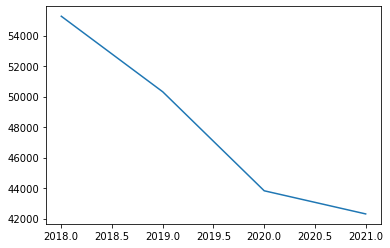

In [76]:

y = new_df['em_g'].groupby([new_df['year']]).mean()
x = [2018,2019,2020,2021]
plt.plot(x,y)

## 도시 별

In [ ]:
y = new_df['em_g'].groupby(new_df['city']).sum()
x = ['제주시','서귀포시']
plt.plot(x,y,'--')

In [ ]:
y = new_df['em_g'].groupby(new_df['city']).mean()
x = ['제주시','서귀포시']
plt.plot(x,y,'--')

총 합계는 서귀포시가 더 많고 평균은 제주시가 더 많다